In [15]:
import precip as pc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

In [16]:
plt.style.use('ggplot')
df = pd.read_csv('flow.csv', index_col=0, header=0, parse_dates=True)
precip = pd.read_csv('precip.csv', index_col=0, header=0, parse_dates=True)
precip = precip.resample('12H').sum()

In [17]:
# pdf = pc.get_precip('ATC01_MADIS', '2015-04-22 00:00', '2015-5-31 23:00')
# del pdf['Snow Melt']
# pdf.columns = ['rainfall [in]']
# pdf.to_csv('precip.csv')
# pdf

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(8.5,5.5), sharex=True)
axs2 = [ax.twinx() for ax in axs]

for ax, ax2, column in zip(axs, axs2, df):
    ax.plot(df[column], color='r')
    ax2.bar(precip.index, precip['rainfall [in]'], color='#5287A7', alpha=0.35, width=0.5, align='edge')
    
    ax.set_title(column)
    ax.set_ylabel('Flow [gpm]', color='#BA3723')
    ax2.set_ylabel('Rainfall [in]', color='#3a7998')
    ax2.grid(b=False)
    
    for tick_label in ax.get_yticklabels():
        tick_label.set_color('#BA3723')
    for tick_label in ax2.get_yticklabels():
        tick_label.set_color('#5287A7')
        
    dateFmt = mdates.DateFormatter('%b %d')
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax.xaxis.set_major_formatter(dateFmt)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    ax.grid(b=True, which='minor')
    ax2.grid(b=False)  



    

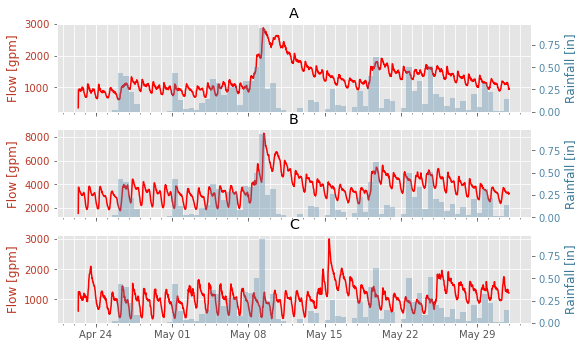

In [19]:
plt.show()

In [20]:
#fig.savefig('output')

In [23]:
fig.savefig('output.png', dpi=600)